In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from numpy.polynomial.polynomial import polyfit

In [2]:
df = pd.read_csv("jplus_sspp.txt",sep=' ')
df

,SPSPEC,RA,DEC,TEFF,LOGG,FEH,SPECTYPE,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,J0861,zSDSS
0,0355-51788-0064,260.550224,56.905830,6076,4.213,-1.151,F5,17.526304,17.207840,17.092297,16.758161,16.709351,16.497959,16.416205,16.138050,16.092394,15.971630,15.972558,15.942645
1,0357-51813-0372,259.215038,56.600472,8273,3.306,-2.597,A0,17.068380,16.251915,15.870674,15.644261,15.666271,15.679823,15.693857,15.739867,15.880729,15.859780,15.923202,15.923858
2,0357-51813-0411,259.740867,56.364036,8982,4.501,-3.510,WD,17.749390,17.721436,17.663353,17.519604,17.484468,17.450169,17.389662,17.615864,17.904028,17.726688,17.880241,18.034611
3,0357-51813-0550,261.044995,56.208497,5646,3.337,-2.025,F5,18.129843,17.700920,17.620277,17.401062,17.290638,17.016707,16.900097,16.544029,16.492199,16.293610,16.253666,16.225510
4,0358-51818-0039,265.047230,56.213000,8774,3.411,-2.000,A0,17.138737,16.339672,15.886298,15.780864,15.774386,15.824640,15.851254,16.013542,16.146977,16.198576,16.285614,16.259933
5,0358-51818-0156,263.848600,56.275507,8041,3.493,-2.191,A0,18.546051,17.686909,17.354002,17.146170,17.164852,17.114086,17.100376,17.123741,17.204315,17.197826,17.281902,17.242338
6,0358-51818-0277,262.237362,56.366903,5721,4.479,-1.217,G2,17.471108,17.288258,17.161781,16.844524,16.734047,16.398077,16.264748,15.911975,15.878081,15.702483,15.685789,15.634157
7,0358-51818-0518,263.326016,57.008204,6048,4.040,-1.784,F5,19.284329,18.835606,18.813152,18.524963,18.693676,18.337357,18.269838,17.958914,17.886160,17.780407,17.740013,17.762138
8,0358-51818-0522,264.092504,57.595325,6404,4.225,-1.665,F5,19.019474,18.665943,18.536802,18.377125,18.193298,18.045948,17.902924,17.715183,17.698460,17.632582,17.557308,17.597729
9,0358-51818-0538,263.792936,57.273152,7849,3.551,-2.394,A0,19.820187,19.126326,18.715618,18.520077,18.535976,18.579651,18.531429,18.504086,18.619345,18.611055,18.641758,18.530750


y= 2.1037928196136764 + -0.0002784769465528101 *x
0.8931191545326715


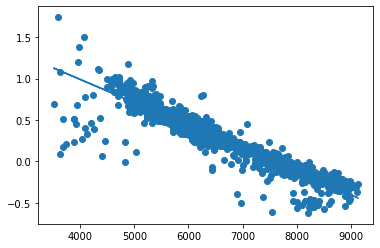

In [3]:
plt.scatter(df.TEFF,df.gSDSS-df.J0660)

b,m = polyfit (df.TEFF,df.gSDSS-df.J0660,1)
np.corrcoef(df.TEFF,df.gSDSS-df.J0660)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.gSDSS-df.J0660)[0,1]
print(a**2)

y= 2.553877321566997 + -0.0003323314727226912 *x
0.8747184620752785


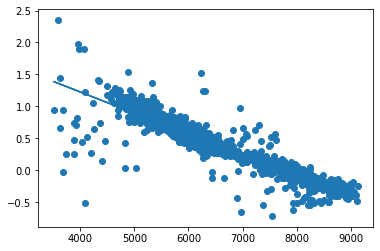

In [4]:
plt.scatter(df.TEFF,df.gSDSS-df.iSDSS)

b,m = polyfit (df.TEFF,df.gSDSS-df.iSDSS,1)
np.corrcoef(df.TEFF,df.gSDSS-df.iSDSS)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.gSDSS-df.iSDSS)[0,1]
print(a**2)

y= 1.6783268973097871 + -0.0002132847464156928 *x
0.8654326582183327


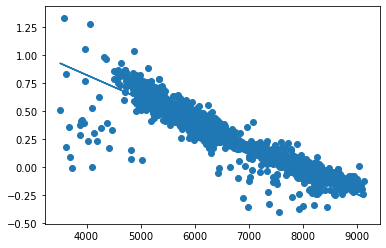

In [5]:
plt.scatter(df.TEFF,df.gSDSS-df.rSDSS)

b,m = polyfit (df.TEFF,df.gSDSS-df.rSDSS,1)
np.corrcoef(df.TEFF,df.gSDSS-df.rSDSS)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.gSDSS-df.rSDSS)[0,1]
print(a**2)

y= 4.182988403822746 + -0.000543895436935435 *x
0.8653864616238994


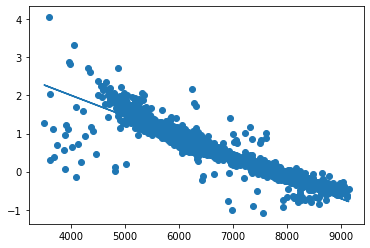

In [6]:
plt.scatter(df.TEFF,df.J0410-df.J0861)

b,m = polyfit (df.TEFF,df.J0410-df.J0861,1)
np.corrcoef(df.TEFF,df.J0410-df.J0861)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.J0410-df.J0861)[0,1]
print(a**2)

y= 3.3634126933156296 + -0.00043502433637191665 *x
0.864851912674484


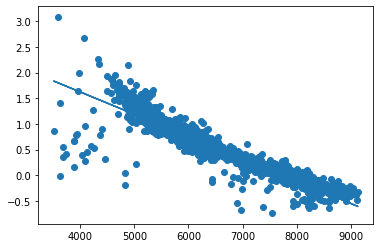

In [7]:
plt.scatter(df.TEFF,df.J0410-df.J0660)

b,m = polyfit (df.TEFF,df.J0410-df.J0660,1)
np.corrcoef(df.TEFF,df.J0410-df.J0660)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.J0410-df.J0660)[0,1]
print(a**2)

y= 2.9233685301207912 + -0.00038734804711632823 *x
0.8629806688547438


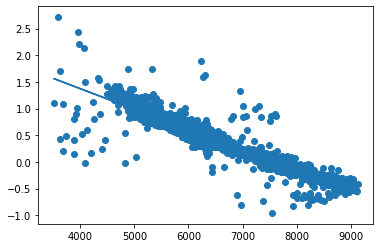

In [8]:
plt.scatter(df.TEFF,df.gSDSS-df.J0861)

b,m = polyfit (df.TEFF,df.gSDSS-df.J0861,1)
np.corrcoef(df.TEFF,df.gSDSS-df.J0861)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.gSDSS-df.J0861)[0,1]
print(a**2)

y= 3.8134971952689525 + -0.000488878862541798 *x
0.8625111913979769


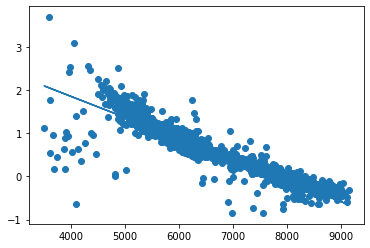

In [9]:
plt.scatter(df.TEFF,df.J0410-df.iSDSS)

b,m = polyfit (df.TEFF,df.J0410-df.iSDSS,1)
np.corrcoef(df.TEFF,df.J0410-df.iSDSS)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.J0410-df.iSDSS)[0,1]
print(a**2)

y= 3.1180036706671763 + -0.00040453216815645207 *x
0.8610205532679148


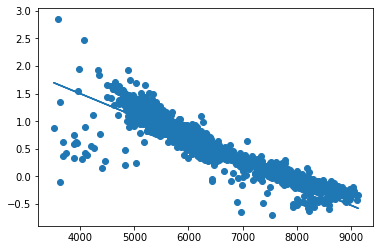

In [10]:
plt.scatter(df.TEFF,df.J0430-df.J0660)

b,m = polyfit (df.TEFF,df.J0430-df.J0660,1)
np.corrcoef(df.TEFF,df.J0430-df.J0660)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.J0430-df.J0660)[0,1]
print(a**2)

y= 3.9375793811742916 + -0.0005134032687199703 *x
0.8609030303179273


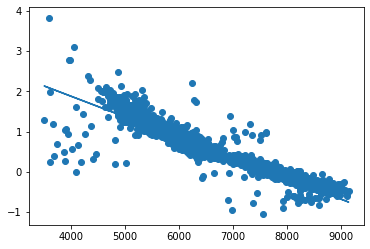

In [11]:
plt.scatter(df.TEFF,df.J0430-df.J0861)

b,m = polyfit (df.TEFF,df.J0430-df.J0861,1)
np.corrcoef(df.TEFF,df.J0430-df.J0861)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.J0430-df.J0861)[0,1]
print(a**2)

y= 4.261376309224724 + -0.000553022418613866 *x
0.8590993512360703


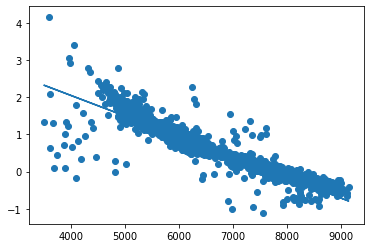

In [12]:
plt.scatter(df.TEFF,df.J0410-df.zSDSS)

b,m = polyfit (df.TEFF,df.J0410-df.zSDSS,1)
np.corrcoef(df.TEFF,df.J0410-df.zSDSS)[0,1]
print("y=",b,"+",m,"*x")
plt.plot(df.TEFF,b+m*df.TEFF)
a=np.corrcoef(df.TEFF,df.J0410-df.zSDSS)[0,1]
print(a**2)